In [1]:
import numpy as np
import pandas as pd
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

In [2]:
df_merged = pd.read_csv('../data/Merged.csv')
X = df_merged.iloc[:,1:-1].values
X = StandardScaler().fit_transform(X)

# PCA(Before outlier removal)

In [5]:
pca_transform = PCA(n_components=2)
X_pca = pca_transform.fit_transform(X)
print(pca_transform.explained_variance_ratio_)

[0.28605364 0.13380006]


In [12]:
X_pca_pd = pd.DataFrame(X_pca, columns=['PC1(28.6%)','PC2(13.4%)'])
X_pca_pd['Aroma type'] = list(df_merged['Label'])

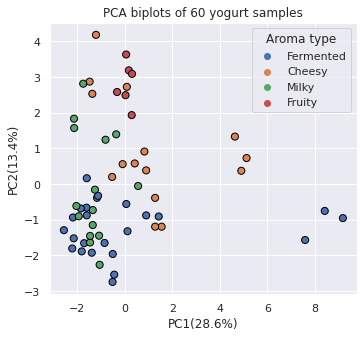

In [13]:
sns.set_theme(style="darkgrid")
hue_order = ['Fermented','Cheesy','Milky','Fruity']
f, ax = plt.subplots(1,1,figsize=(5.5,5))
sns.scatterplot(x='PC1(28.6%)', y='PC2(13.4%)',hue="Aroma type",
                hue_order=hue_order,linewidth=1,data=X_pca_pd, s=50, edgecolor='black', ax=ax)
ax.set_title('PCA biplots of 60 yogurt samples');
plt.savefig('../Figures/pca_outlier.svg',format='svg',dpi=150)

# Remove outliers

In [14]:
outliers, out_inds = [], []
for i in range(len(df_merged.index)):
    if list(X_pca_pd['PC1(28.6%)'])[i] > 4:
        outliers.append( list(df_merged['Sample'])[i] )
        out_inds.append(i)
print(outliers)
print(out_inds)

['S12_1', 'S12_2', 'S12_3', 'S03_1', 'S03_2', 'S03_3']
[3, 4, 5, 27, 28, 29]


In [15]:
df_merged = (df_merged.drop(out_inds)).reset_index().drop(['index'],axis=1)
X = df_merged.iloc[:,1:-1].values
X = StandardScaler().fit_transform(X)

# PCA(After outlier removal)

In [16]:
pca_transform = PCA(n_components=2)
X_pca = pca_transform.fit_transform(X)
print(pca_transform.explained_variance_ratio_)

[0.23542777 0.15772133]


In [17]:
X_pca_pd = pd.DataFrame(X_pca, columns=['PC1(23.5%)','PC2(15.8%)'])
X_pca_pd['Aroma type'] = list(df_merged['Label'])

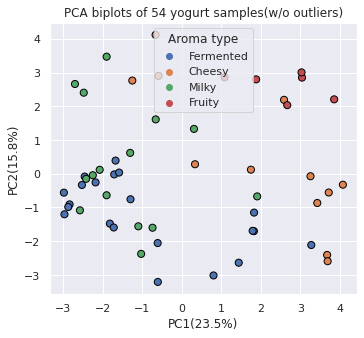

In [18]:
sns.set_theme(style="darkgrid")
hue_order = ['Fermented','Cheesy','Milky','Fruity']
f, ax = plt.subplots(1,1,figsize=(5.5,5))
sns.scatterplot(x='PC1(23.5%)', y='PC2(15.8%)',hue="Aroma type",
                hue_order=hue_order,linewidth=1,data=X_pca_pd, s=50, edgecolor='black', ax=ax)
ax.set_title('PCA biplots of 54 yogurt samples(w/o outliers)');
plt.savefig('../Figures/pca_rmoutlier.svg',format='svg',dpi=150)

# K-means clustering

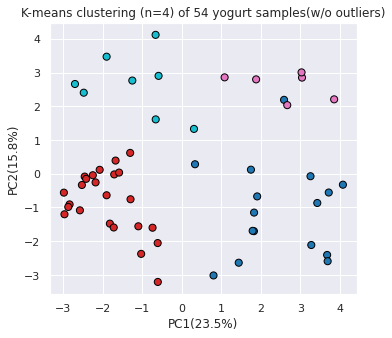

In [19]:
sns.set_theme(style="darkgrid")
y_pred = KMeans(n_clusters=4, random_state=42 ).fit_predict(X)
f, ax = plt.subplots(1,1,figsize=(5.5,5))
ax.scatter(X_pca_pd['PC1(23.5%)'], X_pca_pd['PC2(15.8%)'],s=50, c=y_pred,edgecolors='black', cmap='tab10')
ax.set_title('K-means clustering (n=4) of 54 yogurt samples(w/o outliers)')
ax.set_xlabel('PC1(23.5%)')
ax.set_ylabel('PC2(15.8%)')
plt.savefig('../Figures/kmeans.svg',format='svg',dpi=150)

In [20]:
aroma_groups = {'Fermented':[],'Cheesy':[],'Milky':[],'Fruity':[]}
for i in range(len(df_merged.index)):
    aroma_groups[ list(df_merged['Label'])[i] ].append( list(df_merged['Sample'])[i] )
kmeans_clusters={1:[],2:[],3:[],4:[]}
for i in range(len(y_pred)):
    kmeans_clusters[y_pred[i]+1].append( list(df_merged['Sample'])[i] )

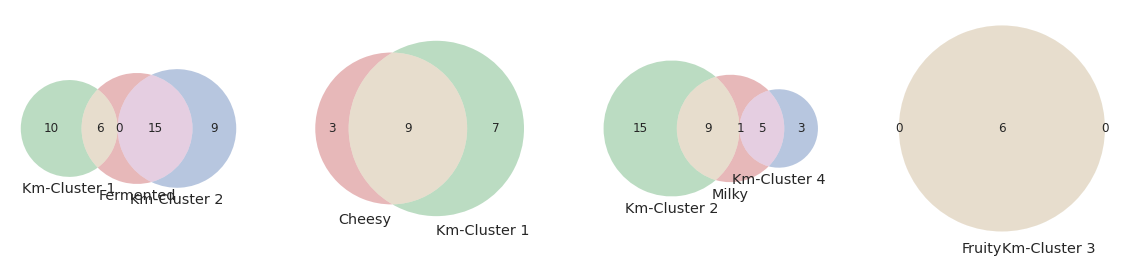

In [26]:
fig, axs = plt.subplots(1,4,figsize=(20,5))
venn3([set(aroma_groups['Fermented']),set(kmeans_clusters[1]), set(kmeans_clusters[2])],
      set_labels = ('Fermented','Km-Cluster 1','Km-Cluster 2'), ax=axs[0] )

venn2([set(aroma_groups['Cheesy']),set(kmeans_clusters[1])], set_labels = ('Cheesy','Km-Cluster 1'),ax=axs[1] )

venn3([set(aroma_groups['Milky']),set(kmeans_clusters[2]), set(kmeans_clusters[4])],
      set_labels = ('Milky','Km-Cluster 2','Km-Cluster 4'), ax=axs[2] )

venn2([set(aroma_groups['Fruity']),set(kmeans_clusters[3])], set_labels = ('Fruity','Km-Cluster 3'),ax=axs[3] )
plt.savefig('../Figures/kmeans_venn.svg',format='svg',dpi=150)